In [92]:
%pip install torch torchvision torchaudio
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import sys
sys.executable

'/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/bin/python'

In [94]:
words = open('names.txt', 'r').read().splitlines()

In [95]:
words[:11]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail']

In [96]:
import torch

In [97]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

In [98]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [99]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1
    

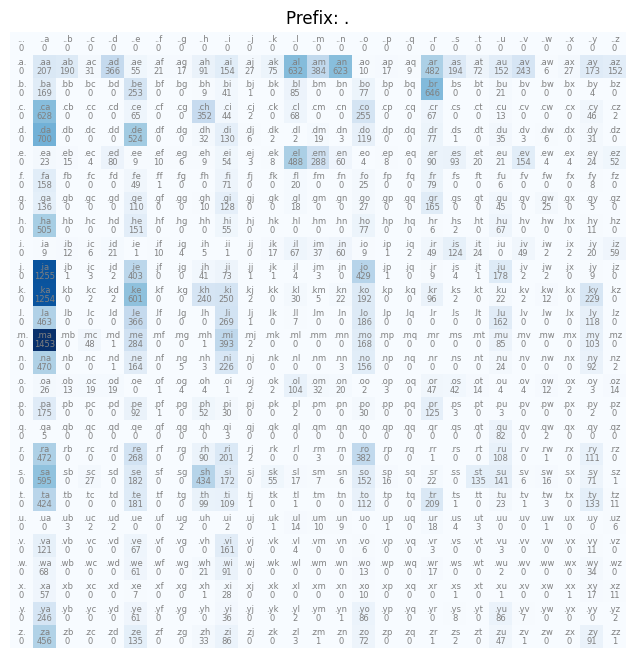

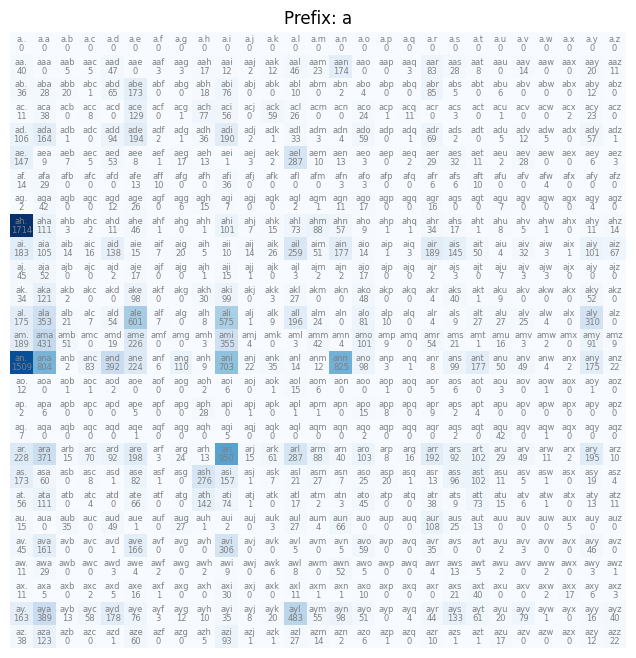

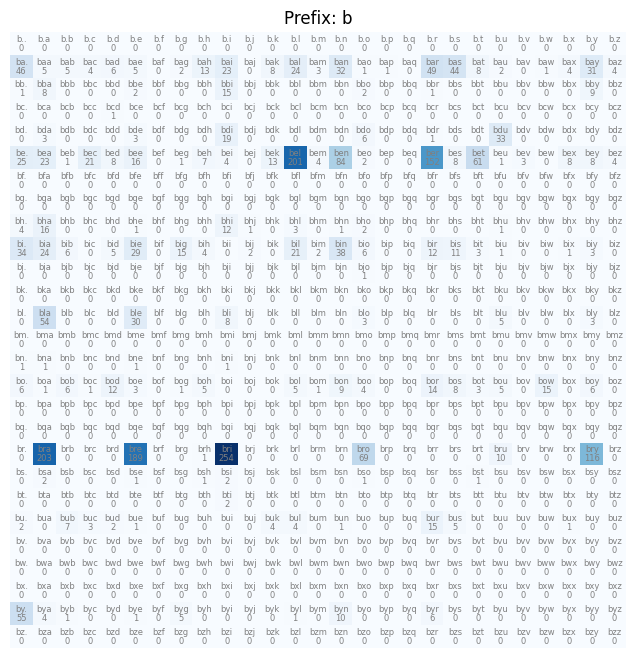

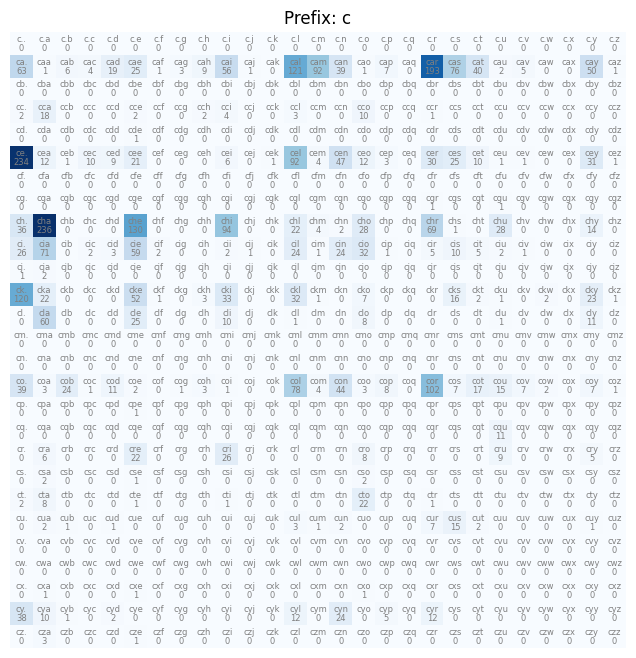

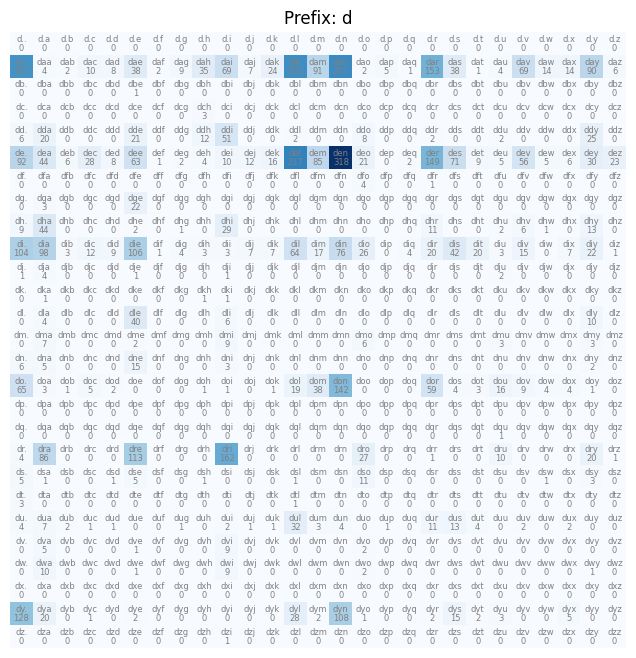

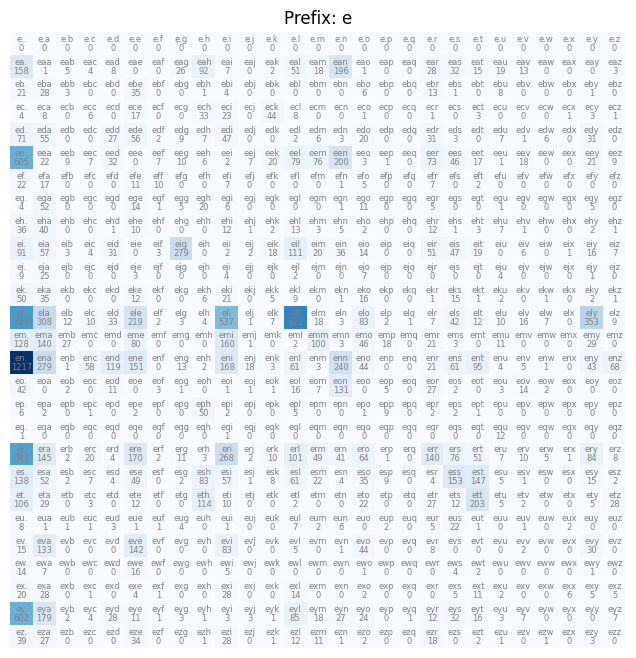

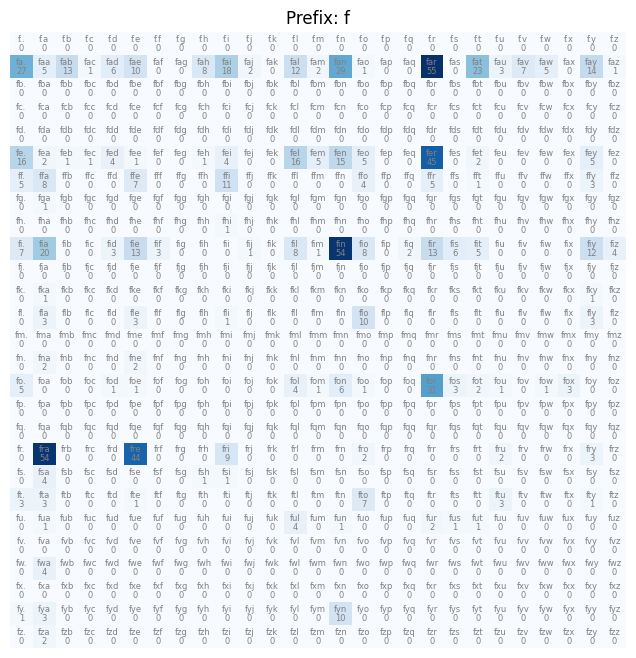

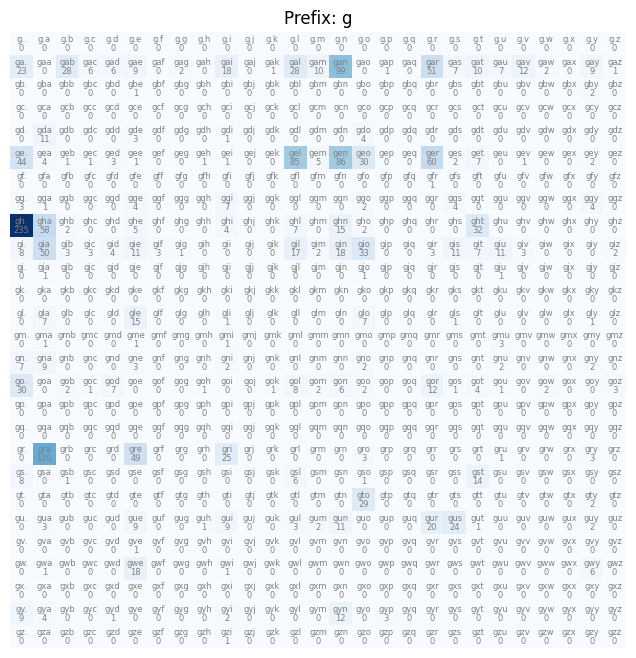

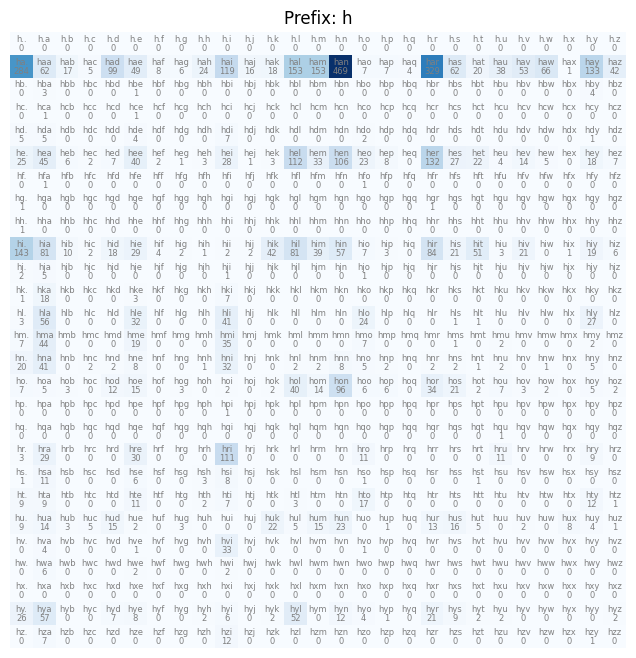

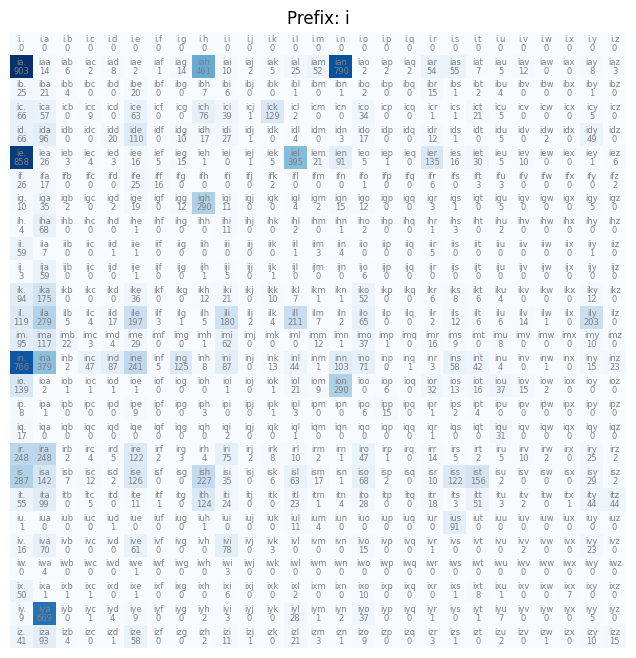

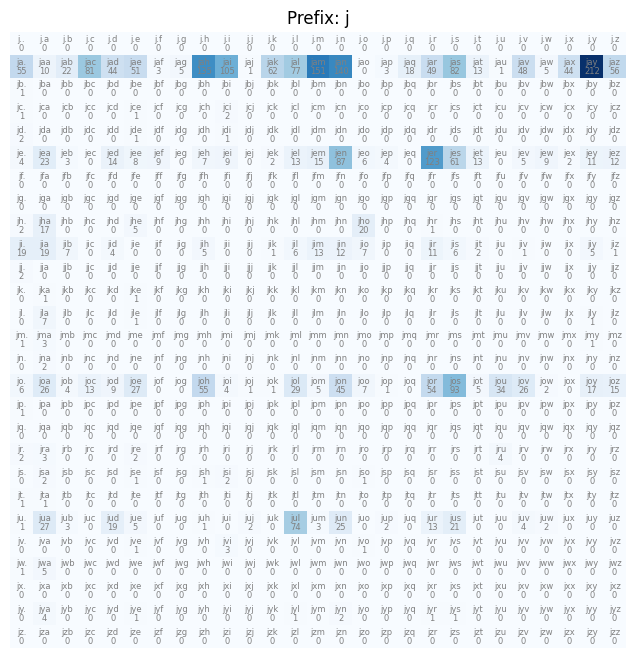

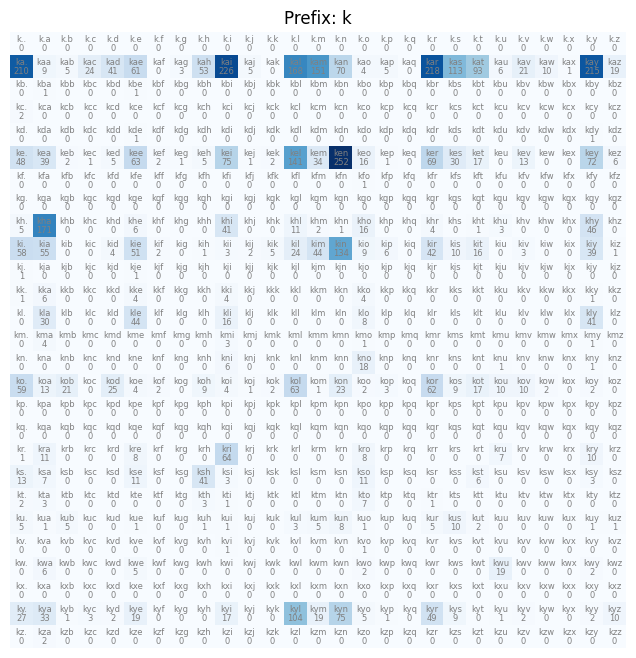

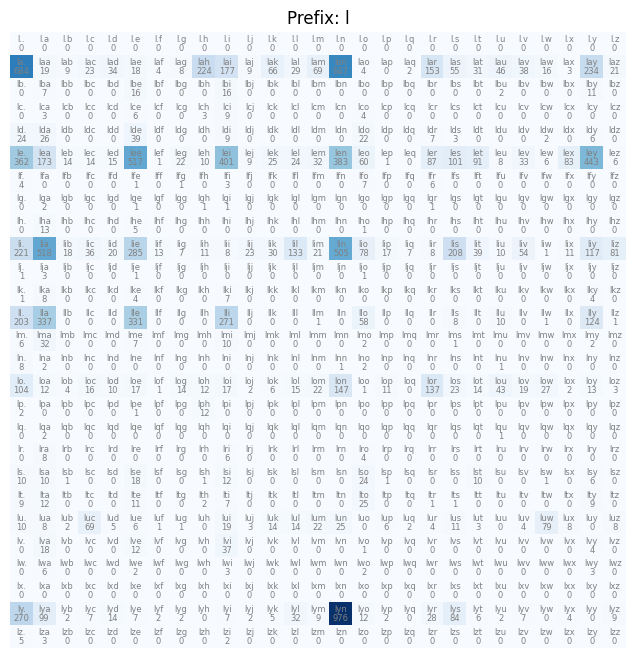

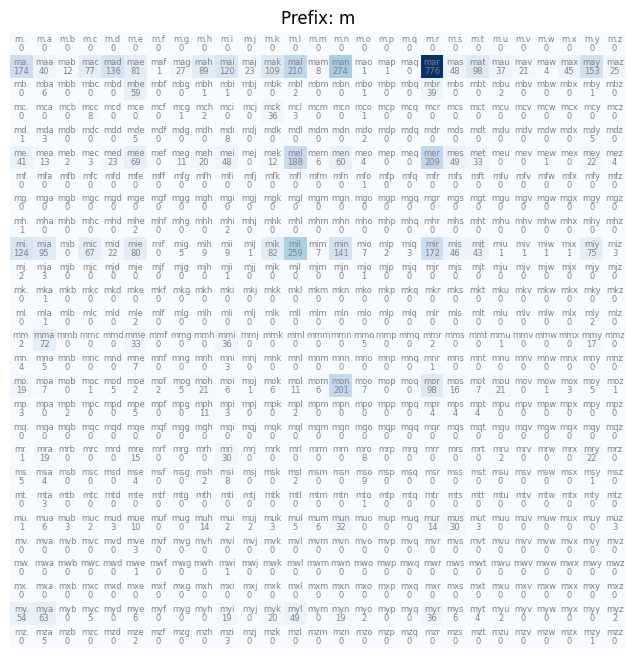

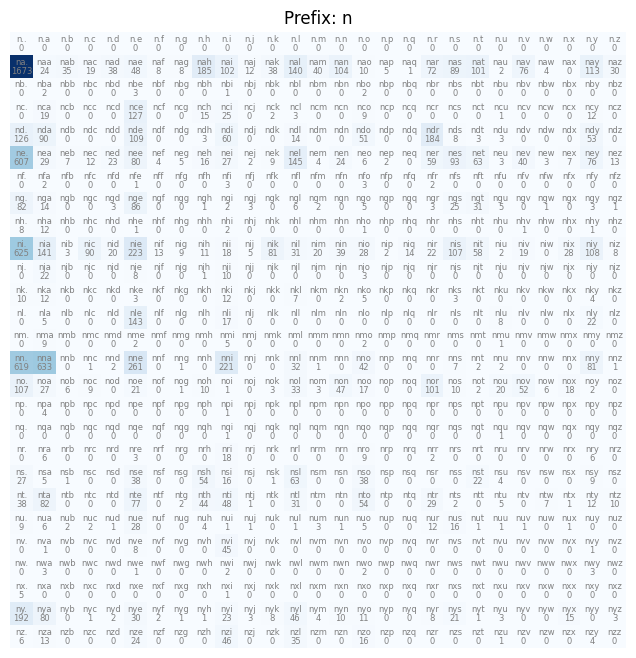

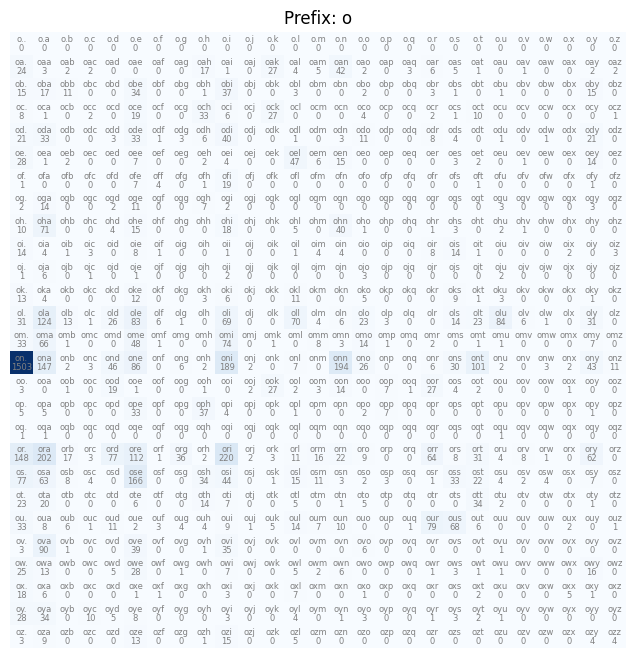

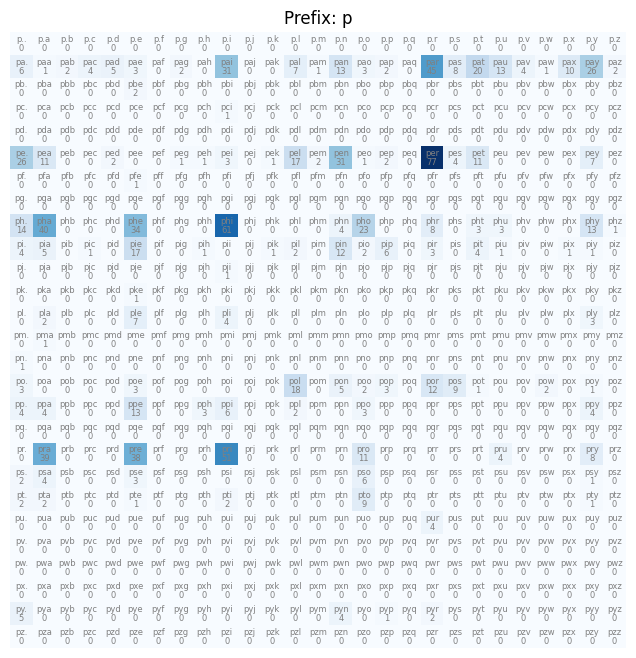

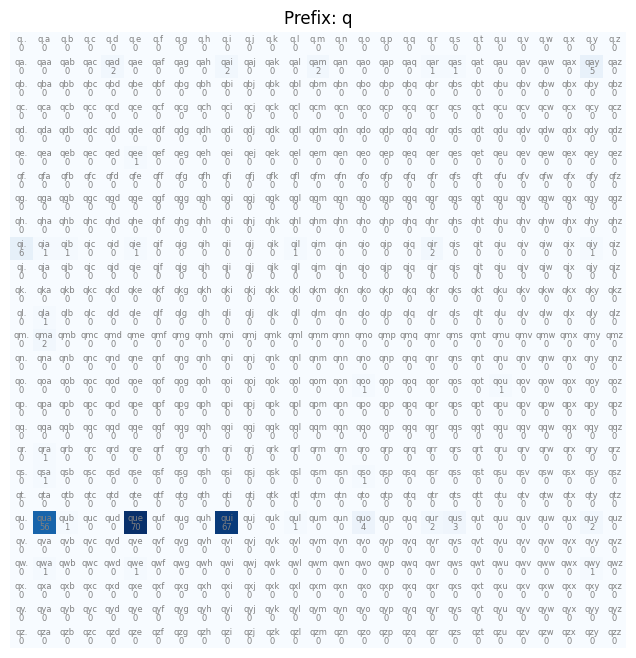

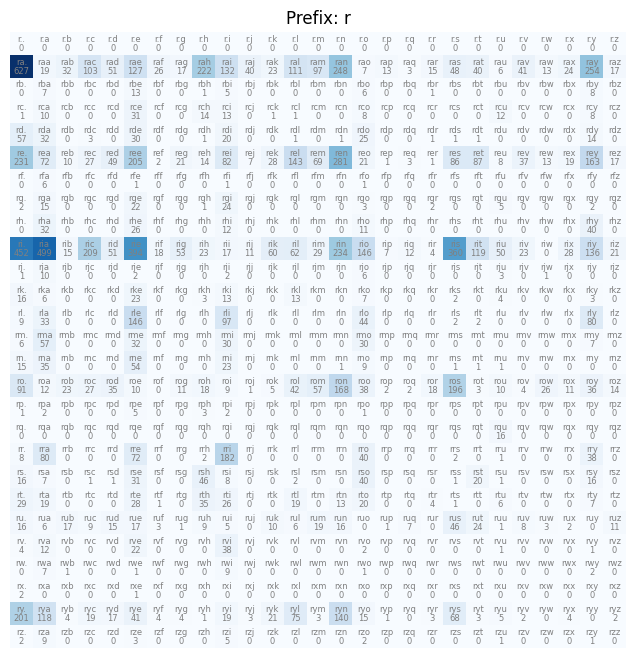

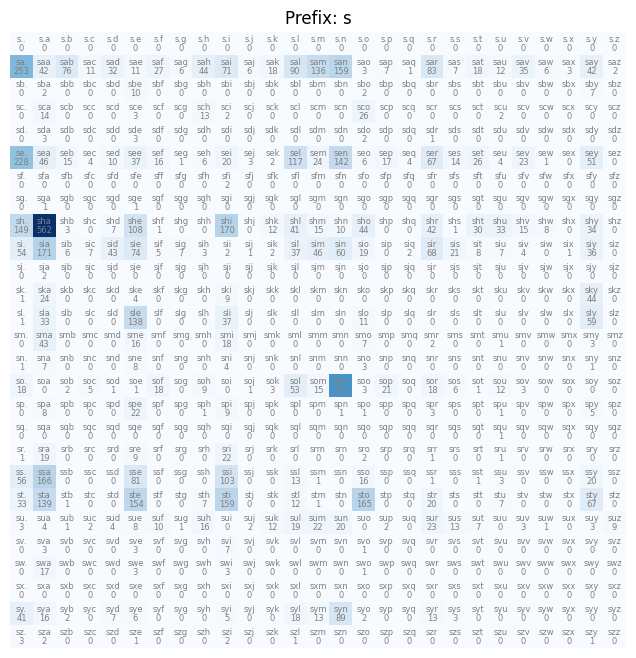

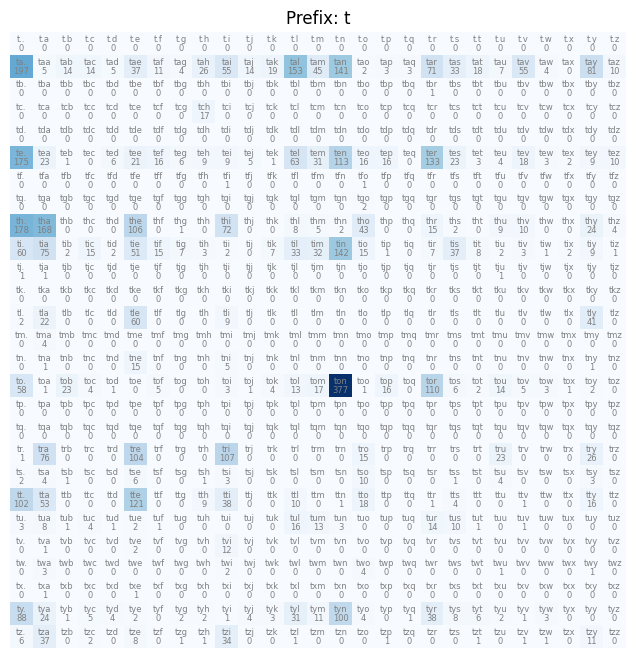

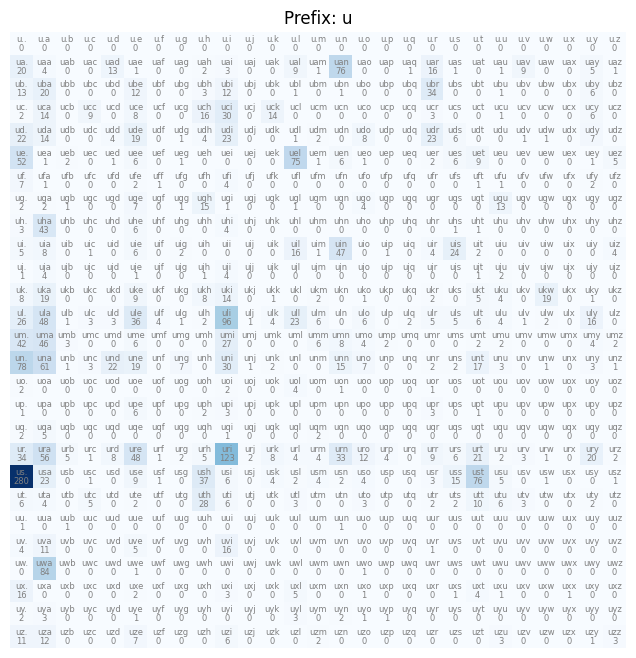

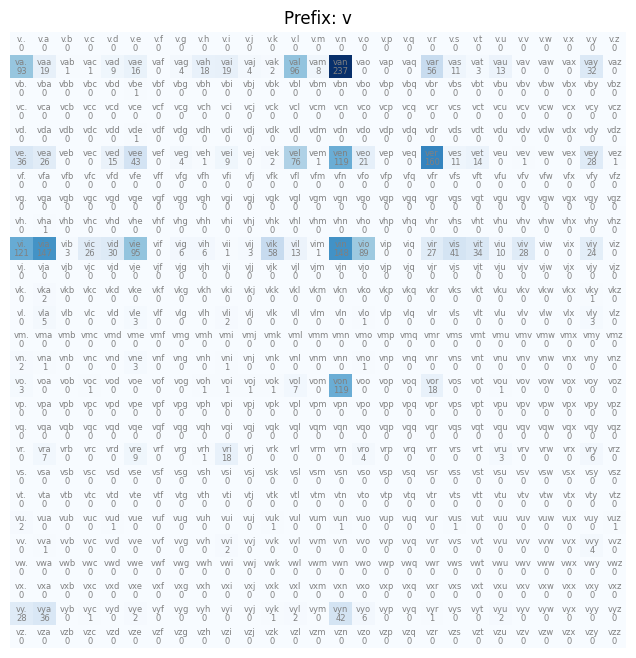

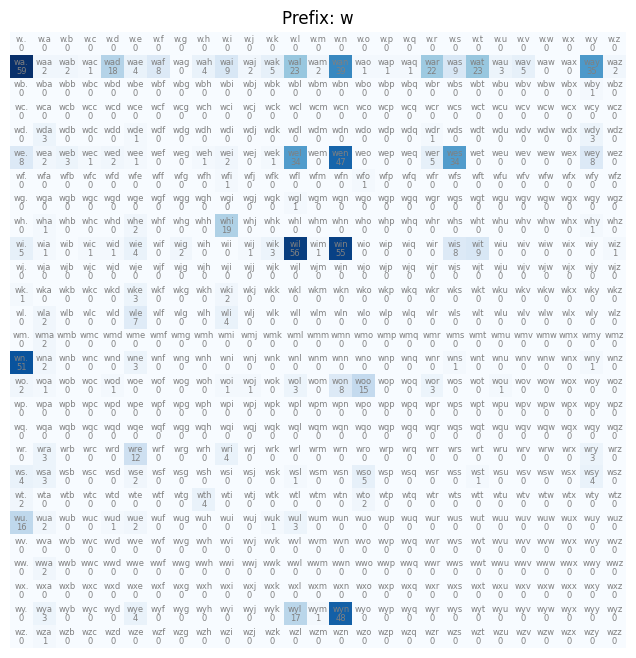

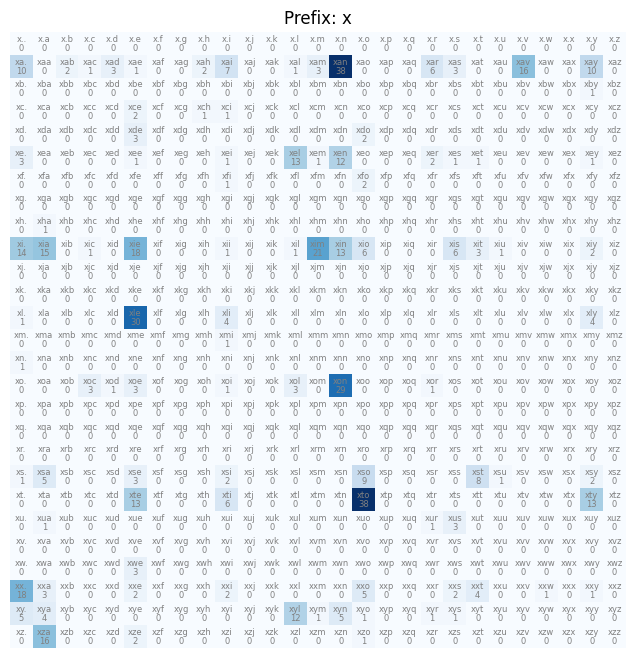

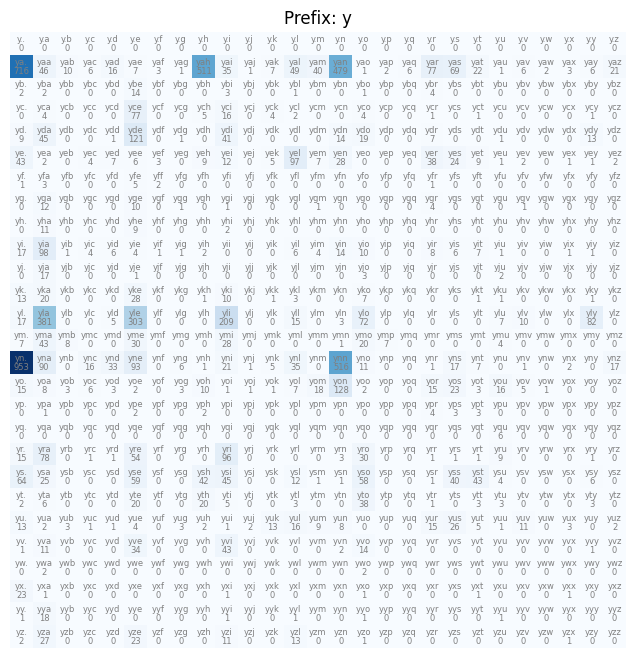

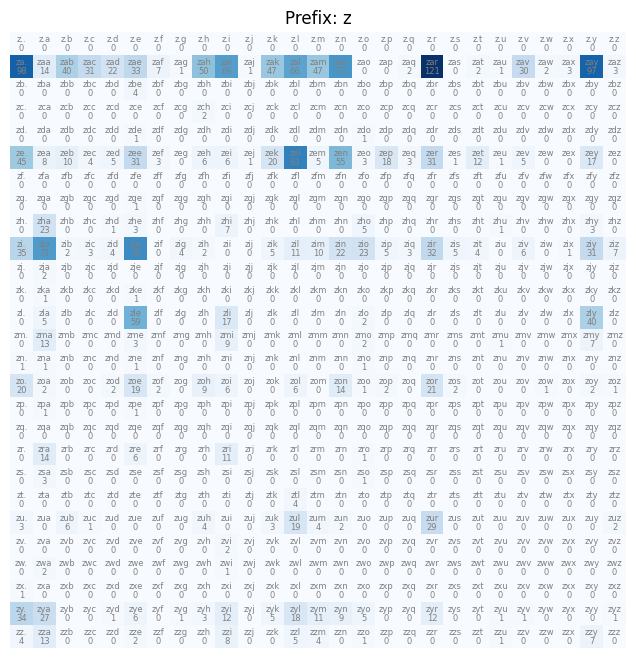

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

for k in range(27):  # pierwszy znak
    plt.figure(figsize=(8, 8))
    plt.imshow(N[k], cmap='Blues')

    for i in range(27):
        for j in range(27):
            chstr = itos[k] + itos[i] + itos[j]
            plt.text(j, i, chstr, ha="center", va="bottom", fontsize=6, color='gray')
            plt.text(j, i, N[k, i, j].item(), ha="center", va="top", fontsize=6, color='gray')

    plt.title(f"Prefix: {itos[k]}")
    plt.axis('off')
    plt.show()


In [101]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1, ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [109]:
import torch.nn.functional as F

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

xenc = F.one_hot(xs[:,0] * 27 + xs[:,1], num_classes=27*27).float()
num = xs.shape[0]

In [119]:
# gradient descent
for k in range(100):
    # forward pass
    logits = xenc @ W  # (N, 27)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

In [120]:
# finally, sample from the trigram model
for i in range(5):
    out = []
    ix1, ix2 = 0, 0  # context ".."
    while True:
      ctx = ix1 * 27 + ix2
      xctx = F.one_hot(torch.tensor([ctx]), num_classes=27*27).float()
      logits = xctx @ W
      counts = logits.exp()
      probs = counts / counts.sum(1, keepdims=True)

      ix3 = torch.multinomial(probs[0], num_samples=1, replacement=True, generator=g).item()
      out.append(itos[ix3])
      if ix3 == 0:
        break
      ix1, ix2 = ix2, ix3
    print(''.join(out))

kypnlqumk.
azalyn.
de.
ues.
hudaqlbyrkfenlsxxnissuznwzbzmzroidelyn.
